In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,precision_score,recall_score,classification_report,confusion_matrix)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
import joblib
print('='*55)
print('STEP 1: DATA LOADING')
print('='*55)     

STEP 1: DATA LOADING


In [4]:
#load dataset 
df=pd.read_csv('iris.csv')

In [5]:
print('='*55)
print('STEP 2: DATA PREPROCESSING ')
print('='*55)  

STEP 2: DATA PREPROCESSING 


In [6]:

print('Missing values before cleaning:')
print(df.isnull().sum())
#2 Remove unnecessary columns (id)
df=df.drop(columns=['Id'])
#3 Check for duplicates raws
print(f"\nNumber of duplicates:{df.duplicated().sum()}")
df=df.drop_duplicates()
#4 Verify datatypes
print("\nData types:")
print(df.dtypes)
#5 Check Outliers (using descriptive statistics)
print("\nDescriptive statistics:")
print(df.describe())
#6 Standardize species names (remove 'Iris-'prefix)
df['Species']=df['Species'].str.replace('Iris-','')
label_encoder=LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
#7 Validate species categories
print("\nUnique Species Values:")
print(df['Species'].unique())
print("\nCleaned dataset head:")
print(df.head())

Missing values before cleaning:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Number of duplicates:3

Data types:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Descriptive statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     147.000000    147.000000     147.000000    147.000000
mean        5.856463      3.055782       3.780272      1.208844
std         0.829100      0.437009       1.759111      0.757874
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Unique Species Values:
[0 1 2]

Cleaned dataset head:
   SepalL

In [7]:
print('='*55)
print('STEP 3:TRAIN TEST SPLIT')
print('='*55)  

STEP 3:TRAIN TEST SPLIT


In [8]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']
#stratified split preserves class distribution 
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3)
print(f"Training set size:{X_train.shape[0]} Samples")
print(f"Test size set:{X_test.shape[0]} Samples")

Training set size:102 Samples
Test size set:45 Samples


In [9]:
print('='*55)
print('STEP 4:MODEL TRAINING')
print('='*55)  

STEP 4:MODEL TRAINING



Training Decision Tree Classifier...


['Tree_classifier.sav']

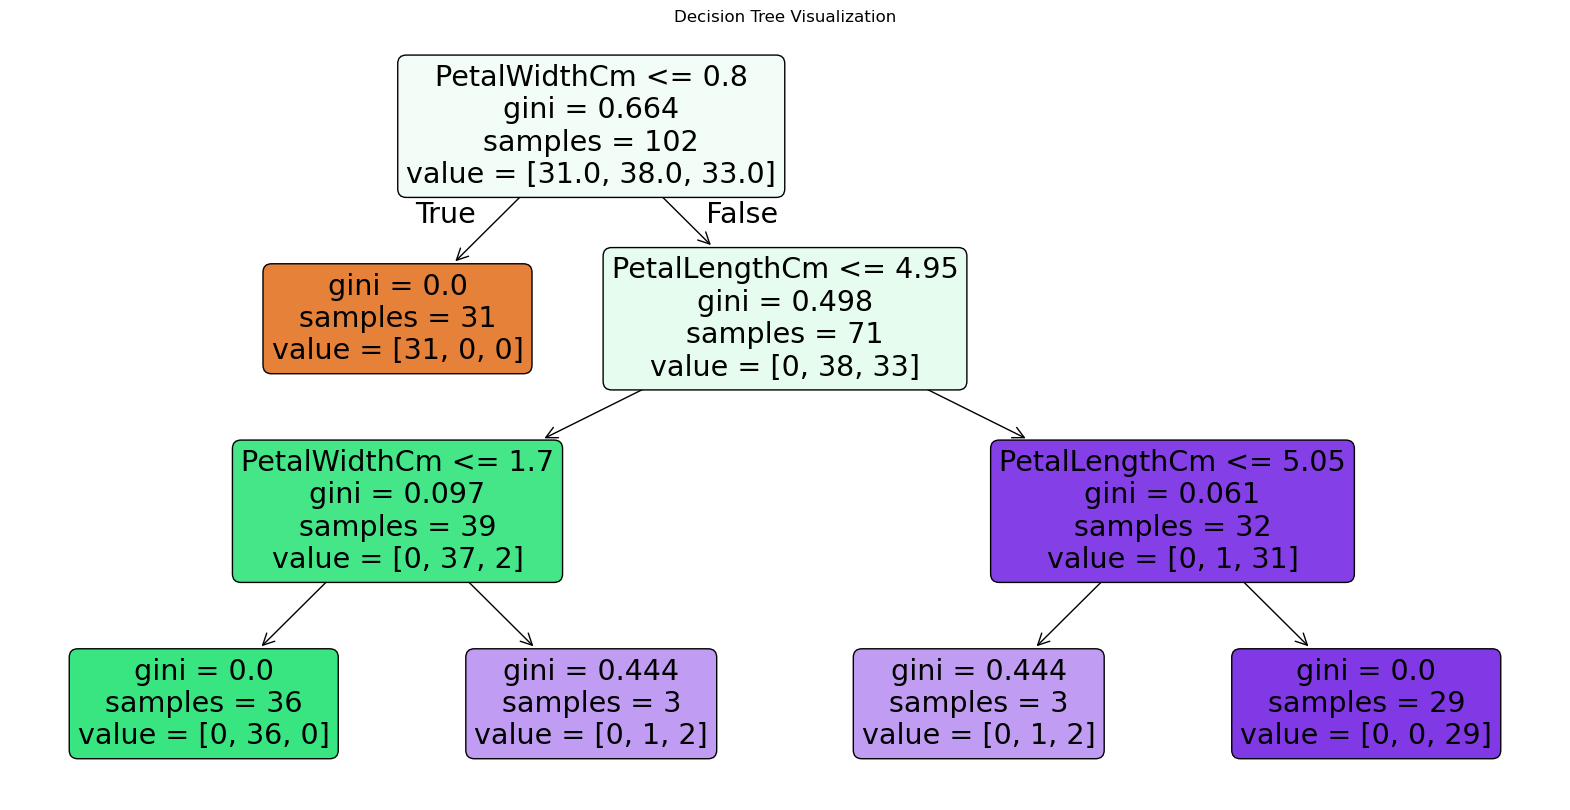

In [26]:
print("\nTraining Decision Tree Classifier...")
#Initialize model with hyperparameters
model =DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)
#Train Model 
model.fit(X_train,y_train)
#Visualize Decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=X.columns,filled=True,rounded=True)
plt.title("Decision Tree Visualization")
#plt.savefig('Decision_tree.png')
joblib.dump(model,'Tree_classifier.sav')

In [11]:
print('='*55)
print('STEP5:MODEL Evaluation')
print('='*55)  

STEP5:MODEL Evaluation


Model Evaluation Performance...

Performance Metrics:
Accuracy:0.9778
Precision:0.9791
Recall:0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(70.72222222222221, 0.5, 'Actual')

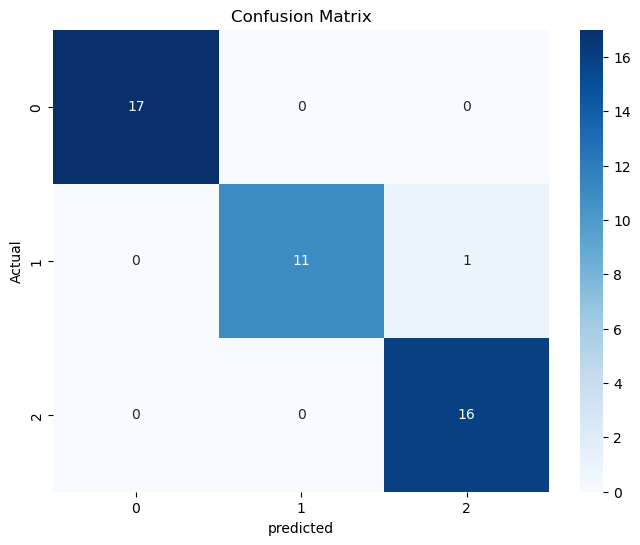

In [12]:
print("Model Evaluation Performance...")
#Make Predictions
y_pred=model.predict(X_test)
accuracy= accuracy_score (y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
print("\nPerformance Metrics:")
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
#Detailed classfication report 
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
#Confusion Matrix
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("predicted")
plt.ylabel('Actual')
#plt.savefig('Confusion_matrix.png')


 feature importance analysis...

Feature Importance:
         Feature  Importance
2  PetalLengthCm    0.962176
3   PetalWidthCm    0.037824
0  SepalLengthCm    0.000000
1   SepalWidthCm    0.000000


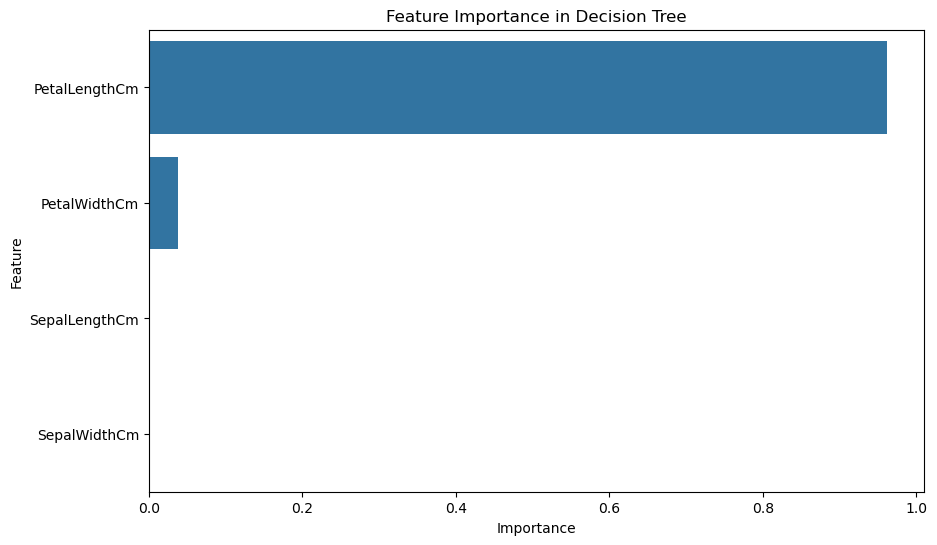

In [13]:
#featureimportances
print("\n feature importance analysis...")
feature_importance=pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance'
,ascending=False)
print("\nFeature Importance:")
print(feature_importance)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature',data=feature_importance,legend=False)
plt.title("Feature Importance in Decision Tree")
plt.savefig('Feature_importaces.png')